In [73]:
import pandas as pd
import gensim
import gensim.downloader as api
from helpers.preprocessing import cleanup 
from helpers.preprocessing import spacy_prep 
import numpy as np

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
fr_stopwords = set(stopwords.words("french"))

In [72]:
import matplotlib.pyplot as plt
from sklearn import manifold,model_selection
from helpers.preprocessing import *
from mpl_toolkits.mplot3d import Axes3D
import warnings; warnings.simplefilter('ignore')


In [82]:
df = load('impresso3.csv')

In [83]:
df = cleanup(df)

In [84]:
data = spacy_prep(df.content)

In [85]:
## fit w2v
#vector size is the size in which we will represent our word vectors in the vector space
#window is the number of words before and after our word of interest that we take into account for our analysis
nlp = gensim.models.word2vec.Word2Vec(data , vector_size=150,window=6, min_count=1, sg=1, epochs=50, workers=10)

In [86]:
#Vector representation of the word "jeu"
word = "jeu"
nlp.wv[word].shape

(150,)

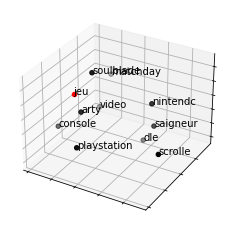

In [87]:
word = "jeu"
fig = plt.figure()

## word embedding
tot_words = [word] + [tupla[0] for tupla in nlp.wv.most_similar(word, topn=10)]
X = nlp.wv[tot_words]

## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)

## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1

#https://nbhosting.inria.fr/builds/ue12-python-numerique/handouts/latest/4-05-matplotlib-plots-3D.html
## plot 3d
def plot_3d(dtf_):
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dtf_[dtf_["input"]==0]['x'], dtf_[dtf_["input"]==0]['y'], dtf_[dtf_["input"]==0]['z'], c="black")
    ax.scatter(dtf_[dtf_["input"]==1]['x'], dtf_[dtf_["input"]==1]['y'], dtf_[dtf_["input"]==1]['z'], c="red")
    ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], yticklabels=[], zticklabels=[])
    for label, row in dtf_[["x","y","z"]].iterrows():
        x, y, z = row
        ax.text(x, y, z, s=label)

plot_3d(dtf_)      

Let's see which of the words connects with the word "jeu" meaning game in french over the years. Let's split the dataset into different time periods

## First let's take the time period between 1964 and 1974

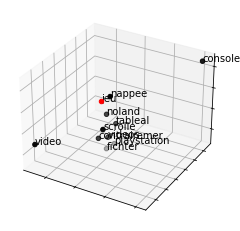

In [93]:
first_date = 1964
end_date = 1984

df_1 = df[(df.year < end) & (df.year >= first_date)]
data = spacy_prep(df_1.content)
nlp = gensim.models.word2vec.Word2Vec(data , vector_size=200,window=7, min_count=1, sg=1, epochs=50, workers=10)

word = "jeu"
fig = plt.figure()

## word embedding
tot_words = [word] + [tupla[0] for tupla in nlp.wv.most_similar(word, topn=10)]
X = nlp.wv[tot_words]

## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)

## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1

#https://nbhosting.inria.fr/builds/ue12-python-numerique/handouts/latest/4-05-matplotlib-plots-3D.html
## plot 3d
def plot_3d(dtf_):
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dtf_[dtf_["input"]==0]['x'], dtf_[dtf_["input"]==0]['y'], dtf_[dtf_["input"]==0]['z'], c="black")
    ax.scatter(dtf_[dtf_["input"]==1]['x'], dtf_[dtf_["input"]==1]['y'], dtf_[dtf_["input"]==1]['z'], c="red")
    ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], yticklabels=[], zticklabels=[])
    for label, row in dtf_[["x","y","z"]].iterrows():
        x, y, z = row
        ax.text(x, y, z, s=label)

plot_3d(dtf_) 

## Then let's take the time period between 1974 and 1984

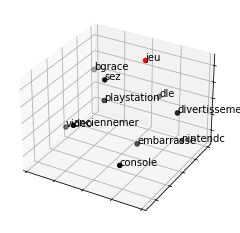

In [92]:
first_date = 1984
end_date = 1994

df_1 = df[(df.year < end) & (df.year >= first_date)]
data = spacy_prep(df_1.content)
nlp = gensim.models.word2vec.Word2Vec(data , vector_size=150,window=6, min_count=1, sg=1, epochs=50, workers=10)

word = "jeu"
fig = plt.figure()

## word embedding
tot_words = [word] + [tupla[0] for tupla in nlp.wv.most_similar(word, topn=10)]
X = nlp.wv[tot_words]

## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)

## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1

#https://nbhosting.inria.fr/builds/ue12-python-numerique/handouts/latest/4-05-matplotlib-plots-3D.html
## plot 3d
def plot_3d(dtf_):
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dtf_[dtf_["input"]==0]['x'], dtf_[dtf_["input"]==0]['y'], dtf_[dtf_["input"]==0]['z'], c="black")
    ax.scatter(dtf_[dtf_["input"]==1]['x'], dtf_[dtf_["input"]==1]['y'], dtf_[dtf_["input"]==1]['z'], c="red")
    ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], yticklabels=[], zticklabels=[])
    for label, row in dtf_[["x","y","z"]].iterrows():
        x, y, z = row
        ax.text(x, y, z, s=label)

plot_3d(dtf_) 

## Then let's take the time period between 1984 and 1994

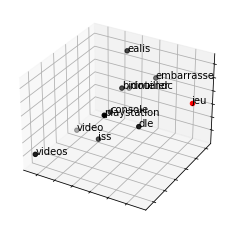

In [97]:
first_date = 1984
end_date = 1994

df_1 = df[(df.year < end) & (df.year >= first_date)]
data = spacy_prep(df_1.content)
nlp = gensim.models.word2vec.Word2Vec(data, vector_size=150, window=6, min_count=1, sg=1, epochs=50, workers=10)

word = "jeu"
fig = plt.figure()

## word embedding
tot_words = [word] + [tupla[0] for tupla in nlp.wv.most_similar(word, topn=10)]
X = nlp.wv[tot_words]

## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)

## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1

#https://nbhosting.inria.fr/builds/ue12-python-numerique/handouts/latest/4-05-matplotlib-plots-3D.html
## plot 3d
def plot_3d(dtf_):
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dtf_[dtf_["input"]==0]['x'], dtf_[dtf_["input"]==0]['y'], dtf_[dtf_["input"]==0]['z'], c="black")
    ax.scatter(dtf_[dtf_["input"]==1]['x'], dtf_[dtf_["input"]==1]['y'], dtf_[dtf_["input"]==1]['z'], c="red")
    ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], yticklabels=[], zticklabels=[])
    for label, row in dtf_[["x","y","z"]].iterrows():
        x, y, z = row
        ax.text(x, y, z, s=label)

plot_3d(dtf_) 

## Then let's take the time period between 1994 and 2004

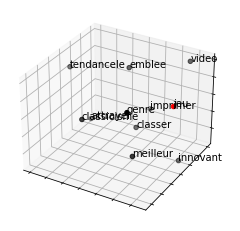

In [78]:
first_date = 1994
end_date = 2004

df_1 = df[(df.year < end) & (df.year >= first_date)]
data = spacy_prep(df_1.content)
nlp = gensim.models.word2vec.Word2Vec(data , vector_size=150,window=6, min_count=1, sg=1, epochs=50, workers=10)

word = "jeu"
fig = plt.figure()

## word embedding
tot_words = [word] + [tupla[0] for tupla in nlp.wv.most_similar(word, topn=10)]
X = nlp.wv[tot_words]

## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)

## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1

#https://nbhosting.inria.fr/builds/ue12-python-numerique/handouts/latest/4-05-matplotlib-plots-3D.html
## plot 3d
def plot_3d(dtf_):
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dtf_[dtf_["input"]==0]['x'], dtf_[dtf_["input"]==0]['y'], dtf_[dtf_["input"]==0]['z'], c="black")
    ax.scatter(dtf_[dtf_["input"]==1]['x'], dtf_[dtf_["input"]==1]['y'], dtf_[dtf_["input"]==1]['z'], c="red")
    ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], yticklabels=[], zticklabels=[])
    for label, row in dtf_[["x","y","z"]].iterrows():
        x, y, z = row
        ax.text(x, y, z, s=label)

plot_3d(dtf_) 

## Then let's take the time period between 2004 and 2014

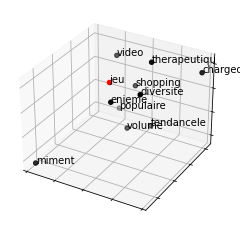

In [79]:
first_date = 2004
end_date = 2014

df_1 = df[(df.year < end) & (df.year >= first_date)]
data = spacy_prep(df_1.content)
nlp = gensim.models.word2vec.Word2Vec(data , vector_size=150,window=6, min_count=1, sg=1, epochs=50, workers=10)

word = "jeu"
fig = plt.figure()

## word embedding
tot_words = [word] + [tupla[0] for tupla in nlp.wv.most_similar(word, topn=10)]
X = nlp.wv[tot_words]

## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)

## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1

#https://nbhosting.inria.fr/builds/ue12-python-numerique/handouts/latest/4-05-matplotlib-plots-3D.html
## plot 3d
def plot_3d(dtf_):
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dtf_[dtf_["input"]==0]['x'], dtf_[dtf_["input"]==0]['y'], dtf_[dtf_["input"]==0]['z'], c="black")
    ax.scatter(dtf_[dtf_["input"]==1]['x'], dtf_[dtf_["input"]==1]['y'], dtf_[dtf_["input"]==1]['z'], c="red")
    ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], yticklabels=[], zticklabels=[])
    for label, row in dtf_[["x","y","z"]].iterrows():
        x, y, z = row
        ax.text(x, y, z, s=label)

plot_3d(dtf_) 

## Then let's take the time period between 2014 and 2019

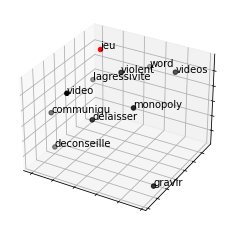

In [90]:
first_date = 2009
end_date = 2019

df_1 = df[(df.year < end) & (df.year >= first_date)]
data = spacy_prep(df_1.content)
nlp = gensim.models.word2vec.Word2Vec(data , vector_size=150,window=6, min_count=1, sg=1, epochs=50, workers=10)

word = "jeu"
fig = plt.figure()

## word embedding
tot_words = [word] + [tupla[0] for tupla in nlp.wv.most_similar(word, topn=10)]
X = nlp.wv[tot_words]

## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)

## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1

#https://nbhosting.inria.fr/builds/ue12-python-numerique/handouts/latest/4-05-matplotlib-plots-3D.html
## plot 3d
def plot_3d(dtf_):
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dtf_[dtf_["input"]==0]['x'], dtf_[dtf_["input"]==0]['y'], dtf_[dtf_["input"]==0]['z'], c="black")
    ax.scatter(dtf_[dtf_["input"]==1]['x'], dtf_[dtf_["input"]==1]['y'], dtf_[dtf_["input"]==1]['z'], c="red")
    ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], yticklabels=[], zticklabels=[])
    for label, row in dtf_[["x","y","z"]].iterrows():
        x, y, z = row
        ax.text(x, y, z, s=label)

plot_3d(dtf_) 